### Retrieve FEWSNET Data:

In [12]:
import requests

url_csv = "https://fdw.fews.net/api/ipcphase.csv?start_date=2000-01-01&end_date=2024-12-31&classification_scale=IPC31"

# params = {
#     "start_date": "2000-01-01",
#     "end_date": "2024-12-31",
#     "classification_scale": "IPC31"
# }

response = requests.get(url_csv)
with open("ipc_data.csv", "wb") as file:
    file.write(response.content)


print("Data downloaded and saved as ipc_data.csv")

Data downloaded and saved as ipc_data.csv


## Retrieve FEWSNET FSC Unit spatial data:

In [13]:
import requests
import geopandas as gpd
from io import BytesIO

# URL of the GeoJSON file
url = 'https://fdw.fews.net/api/feature/?format=geojson&fields=with_attributes&country_code=ET&unit_type=idp_camp&unit_type=livelihood_zone&unit_type=national_park&unit_type=fsc_admin&unit_type=fsc_admin_lhz&unit_type=fsc_lhz&unit_type=fsc_rm_admin'
# Fetch the GeoJSON file
response = requests.get(url)

if response.status_code == 200:
    # Load the GeoJSON into a GeoPandas DataFrame
    gdf__fscunits = gpd.read_file(BytesIO(response.content))
    print(gdf__fscunits.head())
else:
    print(f"Failed to fetch data: {response.status_code}")

unique_countries = sorted(gdf__fscunits['country_code'].unique().tolist())
unique_countries

       id            fnid            name unit_type_code parent_id  \
0  223937  ET2023C1010101  Tahtay Adiyabo      fsc_admin      None   
1  223955  ET2023C1010204            Adwa      fsc_admin      None   
2  223956  ET2023C1010205  Laelay Maychew      fsc_admin      None   
3  223959  ET2023C1010208     Kola Temben      fsc_admin      None   
4  223965  ET2023C1010214            Rama      fsc_admin      None   

   start_date end_date country_code fewsnet_region geographic_group  ...  \
0  2023-10-01     None           ET    East Africa   Eastern Africa  ...   
1  2023-10-01     None           ET    East Africa   Eastern Africa  ...   
2  2023-10-01     None           ET    East Africa   Eastern Africa  ...   
3  2023-10-01     None           ET    East Africa   Eastern Africa  ...   
4  2023-10-01     None           ET    East Africa   Eastern Africa  ...   

  layer_id         layer_name                 geographicunitsetversion_name  \
0     4698  ET_Admin3C_2023_3  Ethiopia FEW

['ET']

## Read data as csv file:

In [14]:
import pandas as pd

#ipc_data_ethiopia = pd.read_csv('ipc_ethiopia.csv')
ipc_data = pd.read_csv('ipc_data.csv')

# Subset Ethiopia rows
subset_df = ipc_data[ipc_data['country'] == 'Ethiopia']

display(subset_df)

,source_organization,source_document,country,country_code,geographic_group,fewsnet_region,geographic_unit_full_name,geographic_unit_name,unit_type,fnid,...,specialization_type,dataseries_specialization_type,data_usage_policy,created,modified,status_changed,collection_status,collection_status_changed,collection_schedule,reporting_date
0,FEWS NET,"Food Security Outlook, Ethiopia",Ethiopia,ET,Eastern Africa,East Africa,"Abaala, Kilbati, Afar, Ethiopia",Abaala,fsc_admin,ET2023C1020203,...,/IPCPhase/,/IPCClassification/,Public,2023-12-01T16:12:04,2023-12-01T18:11:32,2023-12-01T18:11:32,Published,2023-12-01T18:48:20,Ad Hoc,2023-10-01
1,FEWS NET,"Food Security Outlook, Ethiopia",Ethiopia,ET,Eastern Africa,East Africa,"Abaala, Kilbati, Afar, Ethiopia",Abaala,fsc_admin,ET2023C1020203,...,/IPCPhase/,/IPCClassification/,Public,2023-12-01T16:12:24,2023-12-01T18:12:16,2023-12-01T18:12:16,Published,2023-12-01T18:48:20,Ad Hoc,2023-10-01
2,FEWS NET,"Food Security Outlook, Ethiopia",Ethiopia,ET,Eastern Africa,East Africa,"Abaala, Kilbati, Afar, Ethiopia",Abaala,fsc_admin,ET2023C1020203,...,/IPCPhase/,/IPCClassification/,Public,2024-03-29T14:38:54,2024-03-29T14:38:54,2024-03-29T14:39:52,Published,2024-03-29T15:14:29,Ad Hoc,2024-02-01
3,FEWS NET,"Food Security Outlook, Ethiopia",Ethiopia,ET,Eastern Africa,East Africa,"Abaala, Kilbati, Afar, Ethiopia",Abaala,fsc_admin,ET2023C1020203,...,/IPCPhase/,/IPCClassification/,Public,2023-12-01T16:12:44,2023-12-01T18:13:00,2023-12-01T18:13:00,Published,2023-12-01T18:48:20,Ad Hoc,2023-10-01
4,FEWS NET,"Food Security Outlook, Ethiopia",Ethiopia,ET,Eastern Africa,East Africa,"Abaala, Kilbati, Afar, Ethiopia",Abaala,fsc_admin,ET2023C1020203,...,/IPCPhase/,/IPCClassification/,Public,2024-03-29T14:39:14,2024-03-29T14:39:14,2024-03-29T14:39:52,Published,2024-03-29T15:14:29,Ad Hoc,2024-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64819,FEWS NET,"Key Message Update, Ethiopia",Ethiopia,ET,Eastern Africa,East Africa,"Ziway Dugda, Arsi, Oromia, Ethiopia",Ziway Dugda,fsc_admin,ET2023C1040806,...,/IPCPhase/,/IPCClassification/,Public,2024-04-25T15:45:47,2024-04-25T15:45:47,2024-04-25T15:45:58,Published,2024-04-25T17:00:59,Ad Hoc,2024-03-01
64820,FEWS NET,"Key Message Update, Ethiopia",Ethiopia,ET,Eastern Africa,East Africa,"Ziway Dugda, Arsi, Oromia, Ethiopia",Ziway Dugda,fsc_admin,ET2023C1040806,...,/IPCPhase/,/IPCClassification/,Public,2024-06-11T21:20:33,2024-06-11T21:20:33,2024-06-11T21:20:50,Published,2024-06-11T21:25:34,Ad Hoc,2024-05-01
64821,FEWS NET,"Key Message Update, Ethiopia",Ethiopia,ET,Eastern Africa,East Africa,"Ziway Dugda, Arsi, Oromia, Ethiopia",Ziway Dugda,fsc_admin,ET2023C1040806,...,/IPCPhase/,/IPCClassification/,Public,2024-08-20T21:14:14,2024-08-20T21:14:14,2024-08-20T21:14:48,Published,2024-08-20T21:17:07,Ad Hoc,2024-07-01
64822,FEWS NET,"Key Message Update, Ethiopia",Ethiopia,ET,Eastern Africa,East Africa,"Ziway Dugda, Arsi, Oromia, Ethiopia",Ziway Dugda,fsc_admin,ET2023C1040806,...,/IPCPhase/,/IPCClassification/,Public,2024-09-19T17:37:32,2024-09-19T17:37:32,2024-09-19T17:38:14,Published,2024-09-19T18:14:17,Ad Hoc,2024-08-01


## Define relevant fields:

Fields from spatial boundaries `gdf__fscunits`
- fnid
- geometry

Fields from IPC data (Ethiopia only) `subset_df`
- fnid
- scenario_name
- value
- reporting_date

In [15]:
# Subset desirable fields from gdf__fscunits
gdf_fscunits_attributes = gdf__fscunits[['fnid', 'geometry']]

# Subset desirable fields from subset_df
subset_IPC_attributes = subset_df[['fnid', 'scenario_name', 'value', 'reporting_date']]

# Display the first few rows to verify
print("gdf__fscunits subset:")
print(gdf_fscunits_attributes.head())

print("\nsubset_df subset:")
print(subset_IPC_attributes.head())


gdf__fscunits subset:
             fnid                                           geometry
0  ET2023C1010101  MULTIPOLYGON (((37.52481 14.16773, 37.52808 14...
1  ET2023C1010204  POLYGON ((39.01400 14.30400, 39.01750 14.30554...
2  ET2023C1010205  POLYGON ((38.78200 14.23300, 38.78253 14.23254...
3  ET2023C1010208  POLYGON ((38.84200 13.78900, 38.84502 13.78486...
4  ET2023C1010214  MULTIPOLYGON (((38.83329 14.48920, 38.83598 14...

subset_df subset:
             fnid            scenario_name  value reporting_date
0  ET2023C1020203        Current Situation    4.0     2023-10-01
1  ET2023C1020203    Near Term Projection     4.0     2023-10-01
2  ET2023C1020203        Current Situation    4.0     2024-02-01
3  ET2023C1020203  Medium Term Projection     4.0     2023-10-01
4  ET2023C1020203    Near Term Projection     4.0     2024-02-01


## Merge the IPC data with the spatial attributes:

In [16]:
# Merge the DataFrames on 'fnid'
merged_df = subset_IPC_attributes.merge(gdf_fscunits_attributes, on='fnid', how='left')

# Check for unmatched 'fnid' in subset_df (primary DataFrame)
unmatched_fnid = subset_IPC_attributes[~subset_IPC_attributes['fnid'].isin(merged_df['fnid'])]

# Calculate completeness
total_fnid = len(subset_IPC_attributes['fnid'].unique())
matched_fnid = len(merged_df['fnid'].dropna().unique())
unmatched_fnid_count = total_fnid - matched_fnid
completeness_percentage = (matched_fnid / total_fnid) * 100

# Display results
print("Merged DataFrame:")
print(merged_df.head())

print("\nUnmatched FNIDs:")
print(unmatched_fnid)

print(f"\nCompleteness of the merge: {completeness_percentage:.2f}%")
print(f"Unmatched FNID count: {unmatched_fnid_count}")


Merged DataFrame:
             fnid            scenario_name  value reporting_date  \
0  ET2023C1020203        Current Situation    4.0     2023-10-01   
1  ET2023C1020203    Near Term Projection     4.0     2023-10-01   
2  ET2023C1020203        Current Situation    4.0     2024-02-01   
3  ET2023C1020203  Medium Term Projection     4.0     2023-10-01   
4  ET2023C1020203    Near Term Projection     4.0     2024-02-01   

                                            geometry  
0  POLYGON ((39.91100 13.35300, 39.91052 13.33948...  
1  POLYGON ((39.91100 13.35300, 39.91052 13.33948...  
2  POLYGON ((39.91100 13.35300, 39.91052 13.33948...  
3  POLYGON ((39.91100 13.35300, 39.91052 13.33948...  
4  POLYGON ((39.91100 13.35300, 39.91052 13.33948...  

Unmatched FNIDs:
Empty DataFrame
Columns: [fnid, scenario_name, value, reporting_date]
Index: []

Completeness of the merge: 100.00%
Unmatched FNID count: 0


## Query the `scenario_name`  
- 'Current Situation' 
- 'Medium Term Projection ' 
- 'Near Term Projection '

#### This demo will focus on `current situation`

In [17]:
merged_df_current = merged_df[merged_df['scenario_name'] == 'Current Situation']

## Explore temporal granularity over the unit of analysis:

In [18]:
# Group by 'fnid' and count the number of 'reporting_date' entries
fnid_reporting_count = merged_df_current.groupby('fnid')['reporting_date'].count().reset_index()

# Rename columns for clarity
fnid_reporting_count.columns = ['fnid', 'reporting_date_count']

# Display the resulting DataFrame
print(fnid_reporting_count.head())

# Lastly, lets print the unique collection dates appearing in the dataset:

dataset_dates = sorted(merged_df_current['reporting_date'].unique().tolist())
print()
print('List of unique surveyed dates for Food Insecurity Classifications:')
print(dataset_dates)

             fnid  reporting_date_count
0  ET2021C1010101                     4
1  ET2021C1010102                     4
2  ET2021C1010103                     4
3  ET2021C1010104                     4
4  ET2021C1010105                     4

List of unique surveyed dates for Food Insecurity Classifications:
['2022-06-01', '2022-10-01', '2023-02-01', '2023-06-01', '2023-10-01', '2024-02-01', '2024-06-01', '2024-10-01']


#### Is there data *beyond* an annual temporal resolution?

In [19]:
# 1. Create Year Column
merged_df_current['year'] = merged_df_current['reporting_date'].str.split('-').str[0]

# 3. Create Year - Month (YYYY-MM) column
merged_df_current['year_month'] = merged_df_current['reporting_date'].str.split('-').str[:2].str.join('-')

# Ensure you're working with a copy of the DataFrame
merged_df_current = merged_df_current.copy()

# Generate the pivot table
pivot_table_year = merged_df_current.pivot_table(
    index='fnid',            # Rows: unique 'fnid' values
    columns='year',          # Columns: unique years
    values='reporting_date', # Values: count of reporting_date occurrences
    aggfunc='count',         # Aggregation function: count occurrences
    fill_value=0             # Fill missing values with 0
)

# Reset the column index for a clean format (optional)
pivot_table_year = pivot_table_year.reset_index()

# Display the pivot table

# This is commented out because it shows multiple values for each year (a finer granularity is needed)
# with pd.option_context('display.max_rows', None):
#     print(pivot_table_year)

# Generate the pivot table
pivot_table_year_month = merged_df_current.pivot_table(
    index='fnid',            # Rows: unique 'fnid' values
    columns='year_month',          # Columns: unique years
    values='reporting_date', # Values: count of reporting_date occurrences
    aggfunc='count',         # Aggregation function: count occurrences
    fill_value=0             # Fill missing values with 0
)

# Reset the column index for a clean format (optional)
pivot_table_year_month = pivot_table_year_month.reset_index()

# Display the pivot table
with pd.option_context('display.max_rows', None):
    print(pivot_table_year_month)

year_month            fnid  2022-06  2022-10  2023-02  2023-06  2023-10  \
0           ET2021C1010101        1        1        1        1        0   
1           ET2021C1010102        1        1        1        1        0   
2           ET2021C1010103        1        1        1        1        0   
3           ET2021C1010104        1        1        1        1        0   
4           ET2021C1010105        1        1        1        1        0   
5           ET2021C1010106        1        1        1        1        0   
6           ET2021C1010107        1        1        1        1        0   
7           ET2021C1010108        1        1        1        1        0   
8           ET2021C1010109        1        1        1        1        0   
9           ET2021C1010110        1        1        1        1        0   
10          ET2021C1010111        1        1        1        1        0   
11          ET2021C1010112        1        1        1        1        0   
12          ET2021C101011

/var/folders/1w/33c1s5gx5bq1358nxn0pmzlw0000gn/T/ipykernel_91047/2133268925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_current['year'] = merged_df_current['reporting_date'].str.split('-').str[0]
/var/folders/1w/33c1s5gx5bq1358nxn0pmzlw0000gn/T/ipykernel_91047/2133268925.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_current['year_month'] = merged_df_current['reporting_date'].str.split('-').str[:2].str.join('-')


In [20]:

# Convert merged_df_current to a GeoDataFrame
merged_df_current = gpd.GeoDataFrame(merged_df_current, geometry='geometry')

print(merged_df_current.crs)


EPSG:4326


## Visualize the data:

for years: ['2022-06-01', '2022-10-01', '2023-02-01', '2023-06-01', '2023-10-01', '2024-02-01', '2024-06-01', '2024-10-01']


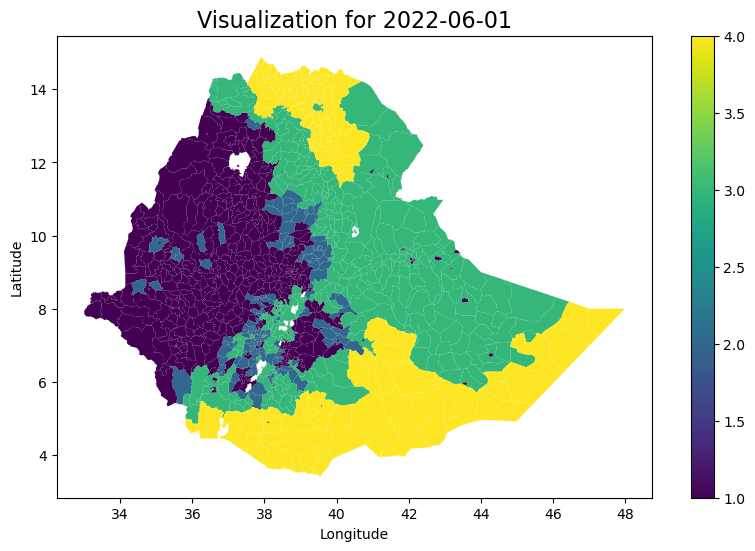

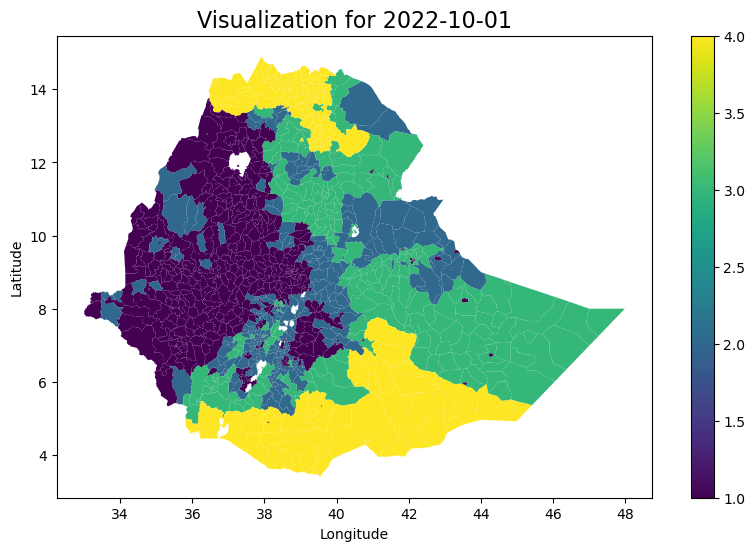

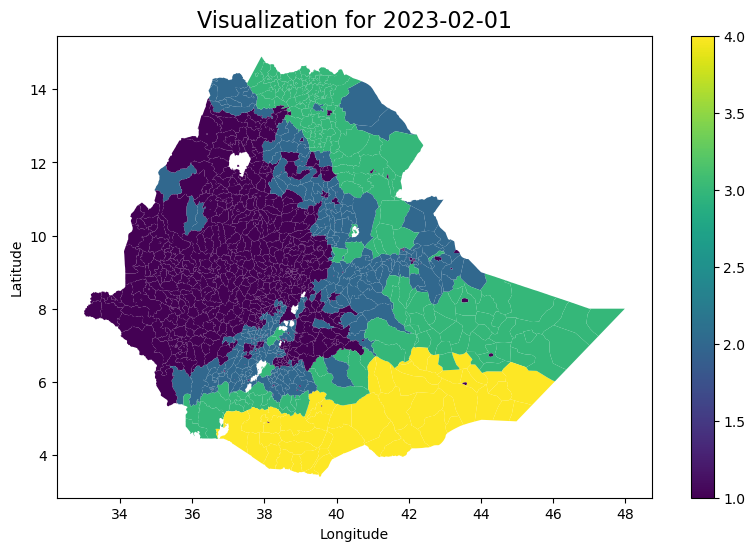

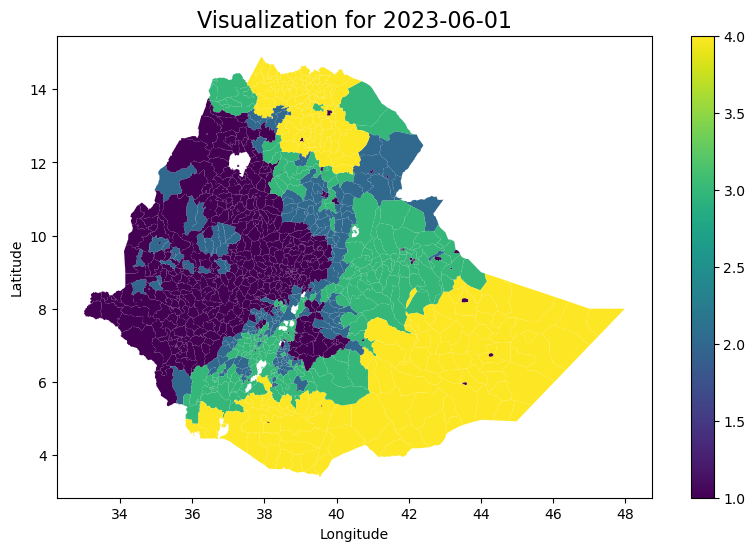

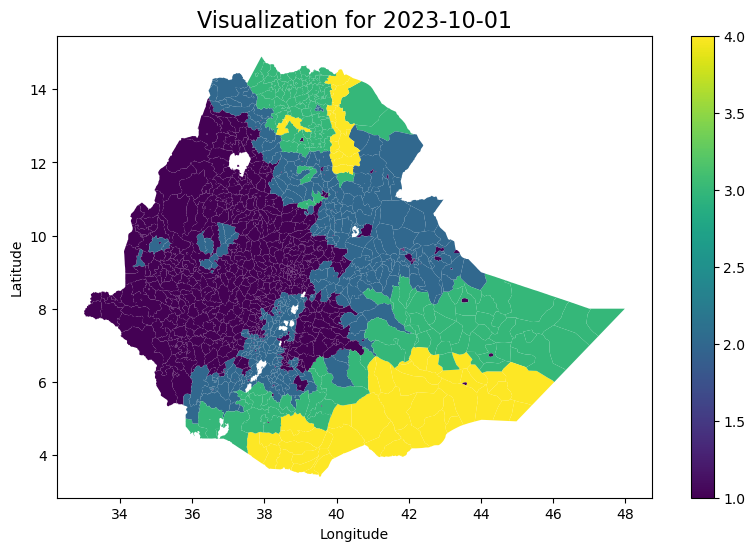

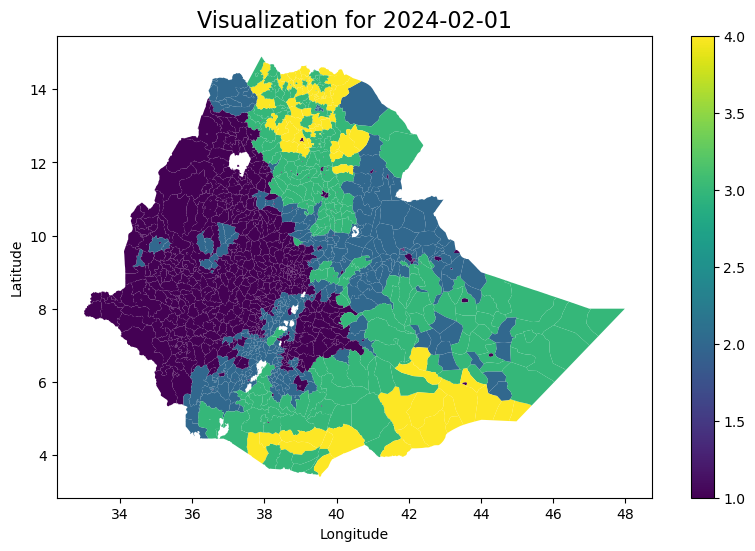

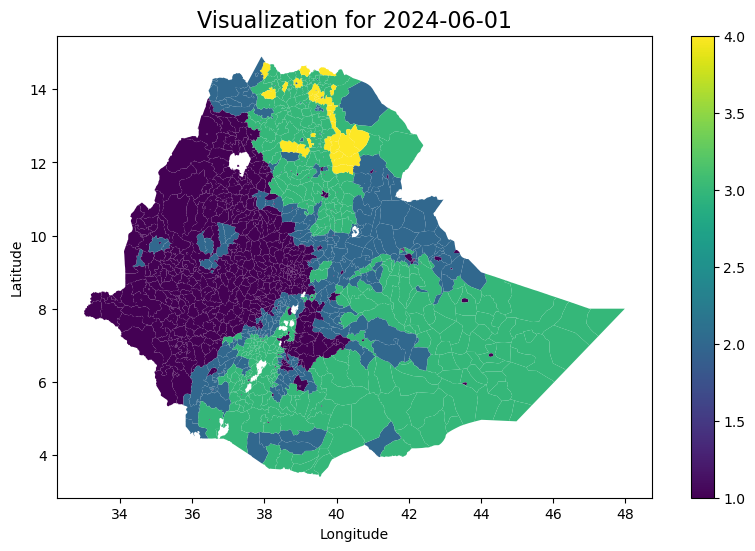

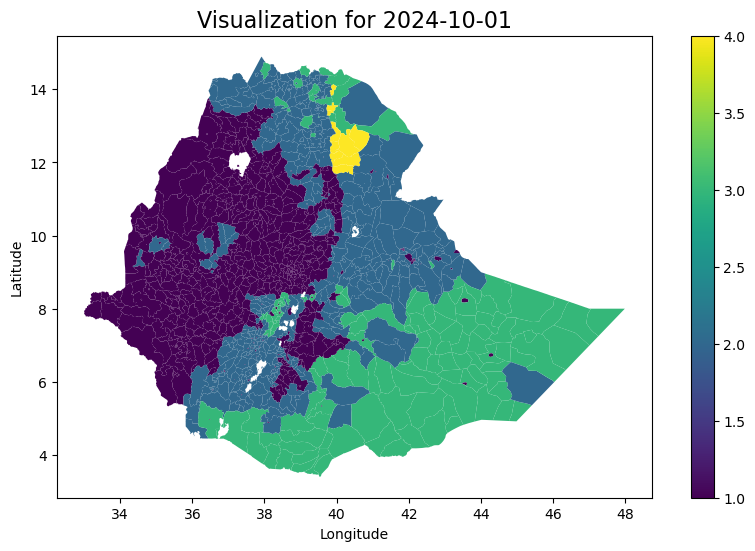

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt


# Ensure 'reporting_date' is in string format in the GeoDataFrame
merged_df_current['reporting_date'] = merged_df_current['reporting_date'].astype(str)

# Iterate over the dates and plot
for date in dataset_dates:
    # Filter the GeoDataFrame for the current date
    gdf_filtered = merged_df_current[merged_df_current['reporting_date'] == date]
    
    # Plot the geometry with values
    ax = gdf_filtered.plot(
        column='value',     # Column to visualize
        cmap='viridis',     # Color map
        legend=True,        # Add a legend
        figsize=(10, 6),    # Figure size
    )
    
    # Add title and labels
    ax.set_title(f"Visualization for {date}", fontsize=16)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    
    # Show the plot
    plt.show()


# Begin to intersect with PG data:

In [22]:
from Utils.give_PG_reference import provide_reference_frame

pg_data = provide_reference_frame('yearly') # ---> we will want monthly


Generating empty PG scaffolders which will be used to validate the spatial and temporal completeness of the selected indice.
This is expected to take several minutes...



/Users/gbenz/miniforge3/envs/viewser/lib/python3.11/site-packages/ingester3/scratch.py:31: UserWarning: No database connection! Will try to use cache for read-only ops as much as I can
  warnings.warn("No database connection! Will try to use cache for read-only ops as much as I can")
/Users/gbenz/miniforge3/envs/viewser/lib/python3.11/site-packages/ingester3/scratch.py:31: UserWarning: No database connection! Will try to use cache for read-only ops as much as I can
  warnings.warn("No database connection! Will try to use cache for read-only ops as much as I can")


In [37]:
# Subset dates
# ------------------------------------------------------------
## We want to process each collection period individually 
# ------------------------------------------------------------
#merged_df_current
dataset_dates

['2022-06-01',
 '2022-10-01',
 '2023-02-01',
 '2023-06-01',
 '2023-10-01',
 '2024-02-01',
 '2024-06-01',
 '2024-10-01']

# Work with just the first collection date as a test:

In [46]:
processing_date = dataset_dates[0]
processing_date

merged_df_current_lim =  merged_df_current[merged_df_current['reporting_date'] == processing_date]

display(merged_df_current_lim)

,fnid,scenario_name,value,reporting_date,geometry,year,year_month
9,ET2021C1020203,Current Situation,4.0,2022-06-01,"POLYGON ((40.03742 13.56128, 40.03867 13.56068...",2022,2022-06
30,ET2021C1020209,Current Situation,4.0,2022-06-01,"POLYGON ((39.77222 13.28015, 39.76732 13.28527...",2022,2022-06
42,ET2021C1041904,Current Situation,1.0,2022-06-01,"POLYGON ((37.39245 10.04636, 37.39828 10.04615...",2022,2022-06
63,ET2021C1130109,Current Situation,1.0,2022-06-01,"POLYGON ((42.13371 9.32294, 42.13386 9.32290, ...",2022,2022-06
84,ET2021C1050699,Current Situation,3.0,2022-06-01,"POLYGON ((42.94506 6.30981, 42.88327 6.26140, ...",2022,2022-06
...,...,...,...,...,...,...,...
22635,ET2021C1010413,Current Situation,4.0,2022-06-01,"POLYGON ((39.24176 12.66478, 39.24183 12.66465...",2022,2022-06
22656,ET2021C1060401,Current Situation,1.0,2022-06-01,"POLYGON ((36.68540 10.31760, 36.68605 10.31637...",2022,2022-06
22686,ET2021C1030801,Current Situation,3.0,2022-06-01,"POLYGON ((38.93829 12.83392, 38.93673 12.83223...",2022,2022-06
22707,ET2021C1030997,Current Situation,1.0,2022-06-01,"POLYGON ((36.49220 10.72238, 36.49337 10.72200...",2022,2022-06


In [68]:
import geopandas as gpd
# Load the first GeoDataFrame
gdf1 = gpd.read_file('/Users/gbenz/Documents/FEWSnet/Data/Processed/extent_shapefile/pg_viewser_extent.shp')

# Load the second GeoDataFrame
gdf2 = merged_df_current_lim

# Perform the intersection
intersected_gdf = gpd.overlay(gdf1, gdf2, how='intersection')

# Reset the index of the resulting GeoDataFrame
intersected_gdf.reset_index(drop=True, inplace=True)

/var/folders/1w/33c1s5gx5bq1358nxn0pmzlw0000gn/T/ipykernel_91047/828139039.py:9: UserWarning: `keep_geom_type=True` in overlay resulted in 6 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersected_gdf = gpd.overlay(gdf1, gdf2, how='intersection')


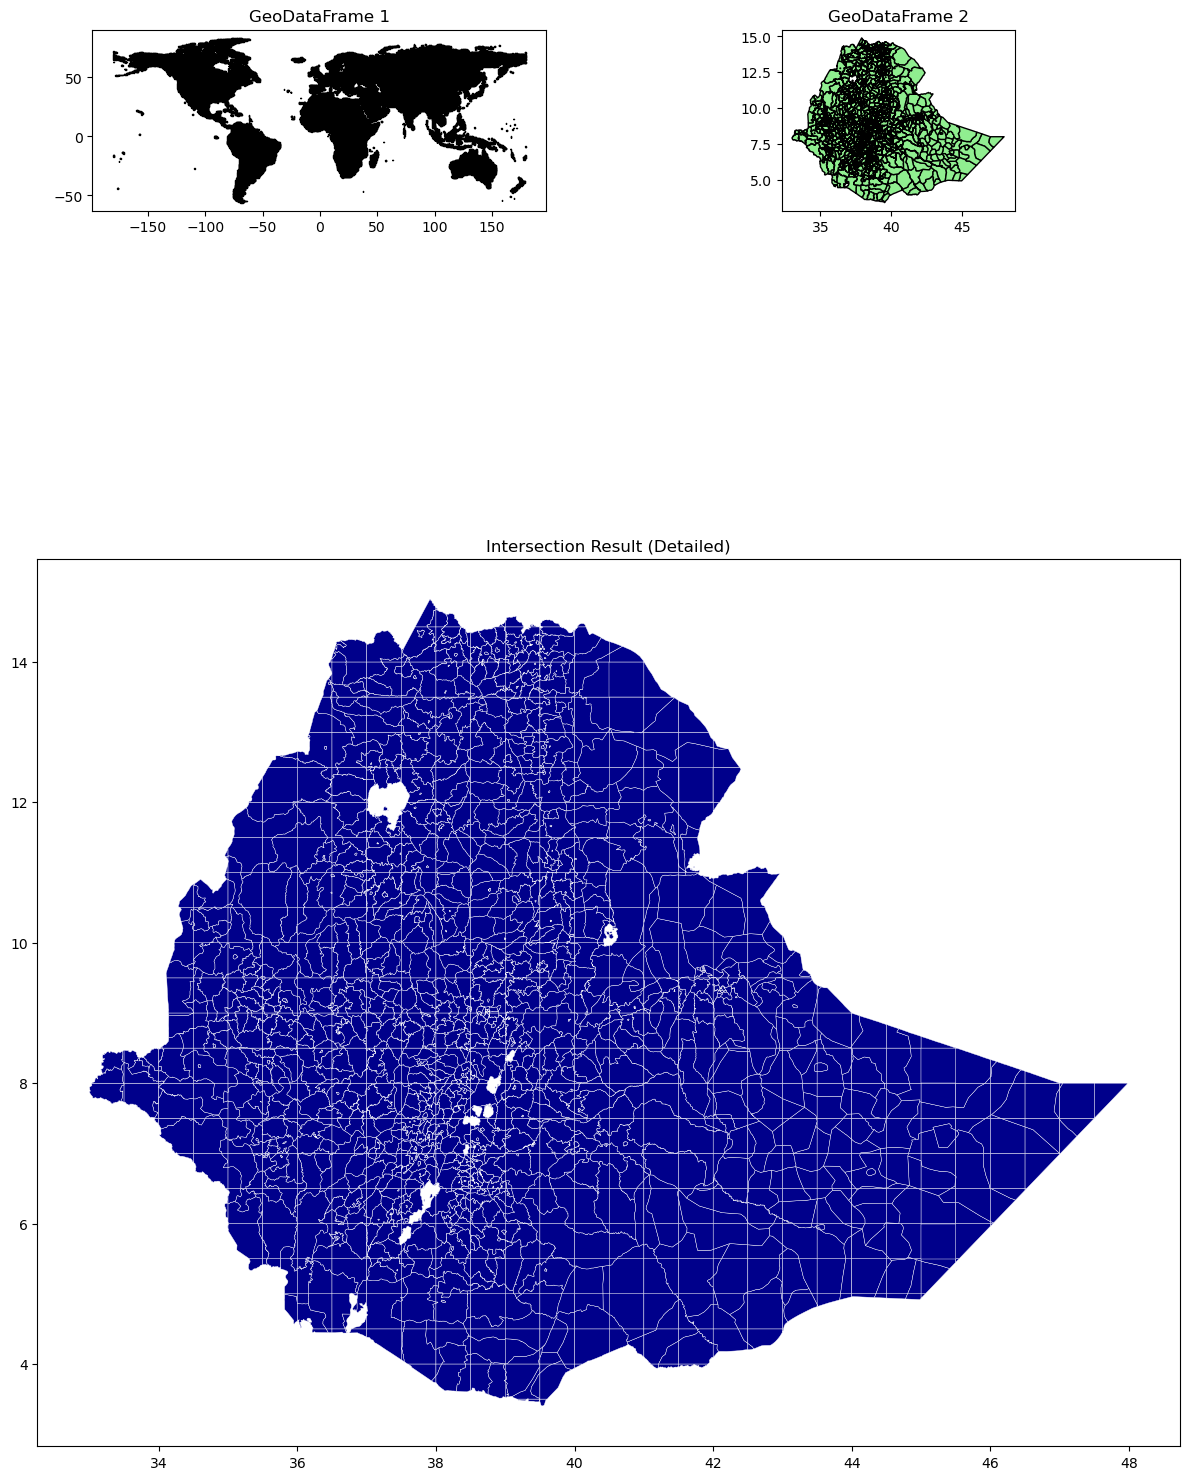

In [69]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Create a figure with a custom gridspec layout
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(9, 2)  # 9 rows and 2 columns

# Plot the first GeoDataFrame (top-left subplot)
ax1 = plt.subplot(gs[0:1, 0])  # First row, first column
gdf1.plot(ax=ax1, color='lightblue', edgecolor='black')
ax1.set_title("GeoDataFrame 1")

# Plot the second GeoDataFrame (top-right subplot)
ax2 = plt.subplot(gs[0:1, 1])  # First row, second column
gdf2.plot(ax=ax2, color='lightgreen', edgecolor='black')
ax2.set_title("GeoDataFrame 2")

# Plot the intersection result (large subplot spanning the bottom 8 rows and both columns)
ax3 = plt.subplot(gs[1:9, 0:2])  # Rows 1 to 8, spanning both columns
intersected_gdf.plot(ax=ax3, color='darkblue', edgecolor='white', linewidth=0.3)
ax3.set_title("Intersection Result (Detailed)")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [70]:
from shapely.geometry import box

from Utils.area_attributes import define_area_attributes
from Utils.build_envelope import envelope_buffer

intersected_gdf = define_area_attributes(intersected_gdf)

# #-----------------------------------------------------------------------
# # Ensure the GeoDataFrame has a projected CRS for accurate area calculations
# if not intersected_gdf.crs.is_projected:
#     intersected_gdf = intersected_gdf.to_crs(epsg=3857)
# #-----------------------------------------------------------------------

# # Calculate the area and store it in a new attribute 'area_sq_km'
# intersected_gdf['Feature_area_sq_km'] = intersected_gdf.geometry.area / 1e6  # Convert from square meters to square kilometers

# # Group by 'pg_id' and calculate the sum of areas for each group
# cell_area = intersected_gdf.groupby('pg_id')['Feature_area_sq_km'].sum().reset_index()

# # Rename the area column to 'Cell_Area'
# cell_area.rename(columns={'Feature_area_sq_km': 'Cell_Area'}, inplace=True)

# # Merge the 'Cell_Area' back into the original GeoDataFrame
# intersected_gdf = intersected_gdf.merge(cell_area, on='pg_id')

#-----------------------------------------------------------------------
# Display the updated GeoDataFrame with the new 'area_sq_km' column
#print(intersected_gdf[['geometry', 'Feature_area_sq_km', 'Cell_Area']].head())
#-----------------------------------------------------------------------


intersected_gdf['Proportion_area'] = intersected_gdf['Feature_area_sq_km'] / intersected_gdf['Cell_Area']


#### Review the attributes


In [71]:
intersected_gdf

,pg_id,lat,long,fnid,scenario_name,value,reporting_date,year,year_month,geometry,Feature_area_sq_km,Cell_Area,Proportion_area
0,134359,3.25,39.25,ET2021C1051103,Current Situation,4.0,2022-06-01,2022,2022-06,"MULTIPOLYGON (((4396202.072 389860.758, 439620...",97.855170,101.190761,0.967037
1,134359,3.25,39.25,ET2021C1051198,Current Situation,4.0,2022-06-01,2022,2022-06,"POLYGON ((4397119.886 389860.758, 4397119.886 ...",3.335591,101.190761,0.032963
2,135079,3.75,39.25,ET2021C1051103,Current Situation,4.0,2022-06-01,2022,2022-06,"POLYGON ((4397119.886 445640.110, 4397119.886 ...",596.005570,3050.889966,0.195355
3,135079,3.75,39.25,ET2021C1051198,Current Situation,4.0,2022-06-01,2022,2022-06,"POLYGON ((4397119.886 389860.758, 4396202.072 ...",364.265619,3050.889966,0.119397
4,135079,3.75,39.25,ET2021C1041290,Current Situation,4.0,2022-06-01,2022,2022-06,"MULTIPOLYGON (((4341460.141 417967.525, 434150...",101.196886,3050.889966,0.033170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,150919,14.75,39.25,ET2021C1010216,Current Situation,4.0,2022-06-01,2022,2022-06,"POLYGON ((4341460.141 1640353.184, 4341482.222...",364.109440,397.731356,0.915466
2876,150919,14.75,39.25,ET2021C1010301,Current Situation,4.0,2022-06-01,2022,2022-06,"POLYGON ((4381815.255 1631643.467, 4381463.942...",30.297170,397.731356,0.076175
2877,150919,14.75,39.25,ET2021C1010318,Current Situation,4.0,2022-06-01,2022,2022-06,"POLYGON ((4384387.537 1635796.027, 4385011.886...",3.324746,397.731356,0.008359
2878,150921,14.75,40.25,ET2021C1020206,Current Situation,4.0,2022-06-01,2022,2022-06,"POLYGON ((4457591.766 1631643.467, 4457573.082...",58.006842,58.006842,1.000000


### 1. Proportional Area:

In [73]:
def calculate_weighted_values(group):
    """
    Calculate the weighted values for each row, group by pg_id, and sum the weighted values.

    Args:
        group (DataFrame): A DataFrame or grouped DataFrame with 'pg_id', 'value', and 'Proportion_area' columns.

    Returns:
        DataFrame: A DataFrame with 'pg_id' and the summed weighted values as 'dissolved_value'.
    """
    # Step 1: Calculate the weighted value for each row
    group['weighted_value'] = group['value'] * group['Proportion_area']
    
    # Step 2: Group by pg_id and sum the weighted values
    dissolved_df = group.groupby('pg_id', as_index=False)['weighted_value'].sum()
    
    # Step 3: Rename the column for clarity
    dissolved_df.rename(columns={'weighted_value': 'dissolved_value'}, inplace=True)
    
    return dissolved_df


result = calculate_weighted_values(intersected_gdf)


### 2. Maximum value above a threshold

In [74]:
def assign_max_above_threshold_with_fallback(df, threshold=0.2, pg_id_column='pg_id'):
    """
    Assign the maximum value if its Proportional_area exceeds a threshold.
    If no values meet the threshold, calculate the weighted average as a fallback.

    Args:
        df (DataFrame): A DataFrame containing 'pg_id', 'value', and 'Proportion_area' columns.
        threshold (float): The Proportional_area threshold.
        pg_id_column (str): The column representing unique pg_ids.

    Returns:
        DataFrame: A DataFrame with 'pg_id' and 'dissolved_value'.
    """
    results = []

    # Group by pg_id and apply the logic for each group
    for pg_id, group in df.groupby(pg_id_column):
        # Filter rows where Proportional_area meets the threshold
        valid_values = group[group['Proportion_area'] >= threshold]

        if not valid_values.empty:
            # Assign the maximum value among the filtered rows
            dissolved_value = valid_values['value'].max()
        else:
            # Fallback: Calculate the weighted sum of value by Proportional_area
            dissolved_value = (group['value'] * group['Proportion_area']).sum()

        # Append result
        results.append({'pg_id': pg_id, 'dissolved_value': dissolved_value})

    # Convert results to a DataFrame
    result_df = pd.DataFrame(results)
    return result_df

result = assign_max_above_threshold_with_fallback(intersected_gdf, threshold=0.2)
print(result)



      pg_id  dissolved_value
0    134359              4.0
1    134360              4.0
2    135076              4.0
3    135077              4.0
4    135078              4.0
..      ...              ...
427  150917              4.0
428  150918              4.0
429  150919              4.0
430  150920              4.0
431  150921              4.0

[432 rows x 2 columns]


#### 3. Combined Threshold Rule:

In [75]:
def assign_combined_threshold(df, proportional_threshold=0.3, critical_value=3, pg_id_column='pg_id'):
    """
    Assign a value based on combined threshold rules:
    1. If a value meets both the proportional threshold and critical value, assign it.
    2. If no value meets the thresholds, calculate the weighted sum of value by Proportional_area.

    Args:
        df (DataFrame): A DataFrame containing 'pg_id', 'value', and 'Proportion_area' columns.
        proportional_threshold (float): Minimum Proportional_area to qualify.
        critical_value (float): Minimum value threshold to qualify.
        pg_id_column (str): The column representing unique pg_ids.

    Returns:
        DataFrame: A DataFrame with 'pg_id' and 'dissolved_value'.
    """
    results = []

    # Group by pg_id and apply the logic for each group
    for pg_id, group in df.groupby(pg_id_column):
        # Step 1: Filter rows meeting both thresholds
        filtered = group[(group['Proportion_area'] >= proportional_threshold) & (group['value'] > critical_value)]

        if not filtered.empty:
            # Assign the maximum value from the filtered rows
            dissolved_value = filtered['value'].max()
        else:
            # Fallback: Calculate the weighted sum of value by Proportional_area
            dissolved_value = (group['value'] * group['Proportion_area']).sum()

        # Append result
        results.append({'pg_id': pg_id, 'dissolved_value': dissolved_value})

    # Convert results to a DataFrame
    result_df = pd.DataFrame(results)
    return result_df


# Apply the rule for each pg_id
result = assign_combined_threshold(intersected_gdf, proportional_threshold=0.3, critical_value=3)

print(result)


      pg_id  dissolved_value
0    134359              4.0
1    134360              4.0
2    135076              4.0
3    135077              4.0
4    135078              4.0
..      ...              ...
427  150917              4.0
428  150918              4.0
429  150919              4.0
430  150920              4.0
431  150921              4.0

[432 rows x 2 columns]


#### 4. Majority Overlap

In [76]:
def assign_majority_overlap(df, pg_id_column='pg_id'):
    """
    Assign the value that occupies the largest proportion of the area (highest Proportional_area).

    Args:
        df (DataFrame): A DataFrame containing 'pg_id' and 'Proportion_area' columns.
        pg_id_column (str): The column representing unique pg_ids.

    Returns:
        DataFrame: A DataFrame with 'pg_id' and the dominant value.
    """
    results = []

    # Group by pg_id and find the value with the largest Proportional_area
    for pg_id, group in df.groupby(pg_id_column):
        # Identify the row with the maximum Proportional_area
        dominant_row = group.loc[group['Proportion_area'].idxmax()]
        dominant_value = dominant_row['value']

        # Append the result
        results.append({'pg_id': pg_id, 'dissolved_value': dominant_value})

    # Convert results to a DataFrame
    result_df = pd.DataFrame(results)
    return result_df

result = assign_majority_overlap(intersected_gdf)
print(result)


      pg_id  dissolved_value
0    134359              4.0
1    134360              4.0
2    135076              4.0
3    135077              4.0
4    135078              4.0
..      ...              ...
427  150917              4.0
428  150918              4.0
429  150919              4.0
430  150920              4.0
431  150921              4.0

[432 rows x 2 columns]


#### 5. Spatial Clustering

## Function to select a process:

1. Proportional Area
2. Maximum value above a threshold
3. Combined Threshold Rule
4. Majority Overlap

In [77]:

def define_process(process_selection, intersected_gdf):
    """
    Execute a selected process based on user input and optional parameters.

    Args:
        process_selection (int): The selected process number (1, 2, 3, or 4).

    Returns:
        DataFrame: The result of the selected process.
    """

    intersected_gdf['Proportion_area'] = intersected_gdf['Feature_area_sq_km'] / intersected_gdf['Cell_Area']

    if process_selection == 1:
        result = calculate_weighted_values(intersected_gdf)
        return result

    elif process_selection == 2:
        # Prompt user input for threshold with a default value
        try:
            threshold = float(input("Enter the threshold for Proportional_area (default is 0.2): ") or 0.2)
        except ValueError:
            print("Invalid input. Using default threshold of 0.2.")
            threshold = 0.2

        result = assign_max_above_threshold_with_fallback(intersected_gdf, threshold=threshold)
        return result

    elif process_selection == 3:
        # Prompt user input for both proportional threshold and critical value
        try:
            proportional_threshold = float(input("Enter the proportional threshold (default is 0.3): ") or 0.3)
        except ValueError:
            print("Invalid input. Using default proportional threshold of 0.3.")
            proportional_threshold = 0.3

        try:
            critical_value = float(input("Enter the critical value (default is 3): ") or 3)
        except ValueError:
            print("Invalid input. Using default critical value of 3.")
            critical_value = 3

        result = assign_combined_threshold(intersected_gdf, proportional_threshold=proportional_threshold, critical_value=critical_value)
        return result

    elif process_selection == 4:
        result = assign_majority_overlap(intersected_gdf)
        return result

    else:
        print("Invalid process selection. Please select a number between 1 and 4.")
        return None


In [80]:
process_selection = 2

result = define_process(process_selection)

In [81]:
result

,pg_id,dissolved_value
0,134359,4.0
1,134360,4.0
2,135076,4.0
3,135077,4.0
4,135078,4.0
...,...,...
427,150917,4.0
428,150918,4.0
429,150919,4.0
430,150920,4.0


## Plot the data

In [59]:
unique_values = dissolved_df['dissolved_value'].unique().tolist()
unique_values

[4.0,
 3.9999999999999996,
 3.9203334711450277,
 3.89969454202341,
 3.9842937472927082,
 1.0,
 2.736606432019696,
 3.5017249881017984,
 3.4369570902844533,
 3.3711937734926294,
 3.289638902580445,
 3.5010361578958262,
 3.438072358614413,
 3.9572321431222868,
 3.754909395057159,
 3.9750337537308544,
 1.0473722003647814,
 2.1288809460698683,
 2.9906370296694167,
 2.833057276147172,
 1.9158448577874165,
 2.008945669915584,
 2.927555169439173,
 2.87606335870435,
 3.2793218936619337,
 3.176709636125326,
 3.0247117468742477,
 3.564179234653827,
 3.9303850420119284,
 3.597225272708645,
 3.9208667459669098,
 1.0850132859499335,
 1.617674370730229,
 2.5102470520016267,
 1.987325572206973,
 1.8365831622711921,
 2.101109599974405,
 2.547432811061689,
 2.179174913322121,
 2.4790789442713614,
 3.0,
 3.3499128472770074,
 3.792427777017685,
 3.404265954531182,
 3.019194901669548,
 2.9999999999999996,
 3.415228282945347,
 3.853400073667178,
 3.902210394731818,
 3.999999999999999,
 1.5323079245594016,


In [ ]:
# Calculate Proportion_area: feature_area / cell_area
intersected_gdf['Proportion_area'] = intersected_gdf['Feature_area_sq_km'] / intersected_gdf['Cell_Area']

# Calculate Proportion_population: feature_population / cell_population
intersected_gdf['Proportion_population'] = intersected_gdf['feature_population'] / intersected_gdf['Cell_population']

# Create a new GeoDataFrame with the specified fields in order
final_gdf = intersected_gdf[[
    'feature_id',          # Unique feature ID
    'ADMIN1',              # Admin unit description
    'pg_id',               # Unique priogrid ID
    'feature_population',  # Population of each individual feature
    'Cell_population',     # Population of the entire PG cell
    'Feature_area_sq_km',        # Area of each individual feature
    'Cell_Area',           # Area of the entire PG cell
    'Proportion_area',     # Feature area / cell area
    'Proportion_population',  # Feature population / cell population
    'geometry'             # Spatial attribute to map the data
]]

In [ ]:
envelope_gdf_buffered = envelope_buffer(intersected_gdf, distance=25000)


# # Generate the envelope (bounding box) for the entire GeoDataFrame
# envelope = intersected_gdf.total_bounds  # Returns (minx, miny, maxx, maxy)

# # Create a GeoDataFrame containing the envelope as a polygon
# envelope_gdf = gpd.GeoDataFrame(geometry=[box(*envelope)], crs=intersected_gdf.crs)

# # Add a 25 km buffer to the envelope (assuming CRS is in meters)
# buffer_distance = 25000  # 25 km in meters
# envelope_gdf_buffered = envelope_gdf.copy()
# envelope_gdf_buffered['geometry'] = envelope_gdf.geometry.buffer(buffer_distance)

# Plot the original intersected_gdf, envelope, and buffered envelope
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the intersected GeoDataFrame
intersected_gdf.plot(ax=ax, edgecolor='black', color='lightblue', label='Intersected GeoDataFrame')

# Plot the buffered envelope
envelope_gdf_buffered.plot(ax=ax, edgecolor='green', facecolor='none', linewidth=2, linestyle='--', label='Buffered Envelope (25 km)')

# Add legend and title
ax.legend()
ax.set_title("GeoDataFrame with Envelope and 25 km Buffer")

# Show the plot
plt.show()

In [26]:
# This checks the average to make sure it is close to what is expected of a standard PG resolution
average_cell_area = intersected_gdf['Cell_Area'].mean()
print(average_cell_area)

55 * 55

23936.266632112704


3025

### To Do:

if year entered is beyond the bounds of the years available identify most recent data and insert this new year
example: worldpop data ends at 2020 --> if 2024 is entered, locate 2020 data. 

In [2]:
def get_population_data_url(year):
    """
    Finds the URL for the specified year in the given text file.

    Args:
        year (int): The year to look for.
        file_path (str): Path to the text file containing year-URL pairs.

    Returns:
        str: The URL associated with the given year, or a message if not found.
    """
    file_path = 'Data/External/Population_Reference.txt'
    try:
        with open(file_path, 'r') as file:
            for line in file:
                if line.startswith(str(year) + ":"):
                    return line.split(": ", 1)[1].strip()
        return f"No URL found for the year {year}."
    except FileNotFoundError:
        return f"The file {file_path} does not exist."


In [45]:
# Example usage
processing_year = processing_date.split('-')[0]
print(processing_year)

year = 2020
url = get_population_data_url(year)
print(url)

2022
https://data.worldpop.org/GIS/Population/Global_2000_2020/2020/0_Mosaicked/ppp_2020_1km_Aggregated.tif


In [29]:
name = url.split('/')[8]
print(name)

ppp_2020_1km_Aggregated.tif


In [30]:
import os
import requests

# Specify the folder to save the downloaded file
save_folder = "Data/External/Population"  # Replace with your desired folder path

filename = url.split('/')[8]

# Ensure the folder exists
os.makedirs(save_folder, exist_ok=True)

# Full path to save the file
save_path = os.path.join(save_folder, filename)

# Download the file
print("Downloading WorldPop population data...")
response = requests.get(url, stream=True)
response.raise_for_status()  # Raise an error for bad responses

# Save the file in chunks to handle large downloads
with open(save_path, 'wb') as file:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            file.write(chunk)

print(f"File downloaded successfully to: {save_path}")

KeyboardInterrupt: 

In [ ]:
import os
import requests
from pathlib import Path

def download_worldpop_data(url, save_folder=None):
    """
    Download a file from a given URL and save it to a specified or default folder.

    Args:
        url (str): The URL of the file to be downloaded.
        save_folder (str or None): The folder path where the file should be saved. 
                                   Defaults to "Data/External/Population/<filename.tif>" relative to the project root.

    Returns:
        str: The full path to the downloaded file.
    """
    try:
        # Extract the filename from the URL
        filename = url.split('/')[-1]

        # Determine the save folder
        if save_folder is None:
            # Map the default location programmatically
            project_root = Path(__file__).resolve().parent.parent
            save_folder = project_root / 'Data' / 'External' / 'Population'

        # Ensure the save folder exists
        os.makedirs(save_folder, exist_ok=True)

        # Construct the full save path
        save_path = os.path.join(save_folder, filename)

        # Download the file
        print("Downloading WorldPop population data...")
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an error for bad responses

        # Save the file in chunks
        with open(save_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:
                    file.write(chunk)

        print(f"File downloaded successfully to: {save_path}")
        return save_path

    except requests.exceptions.RequestException as e:
        print(f"An error occurred during download: {e}")
        return None


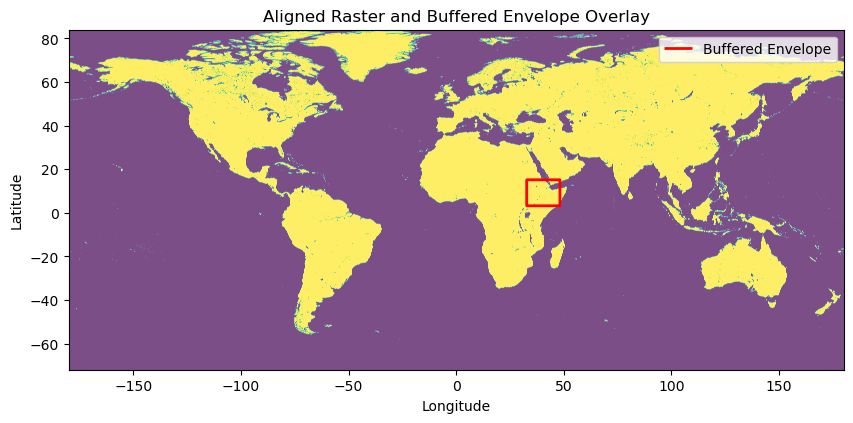

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


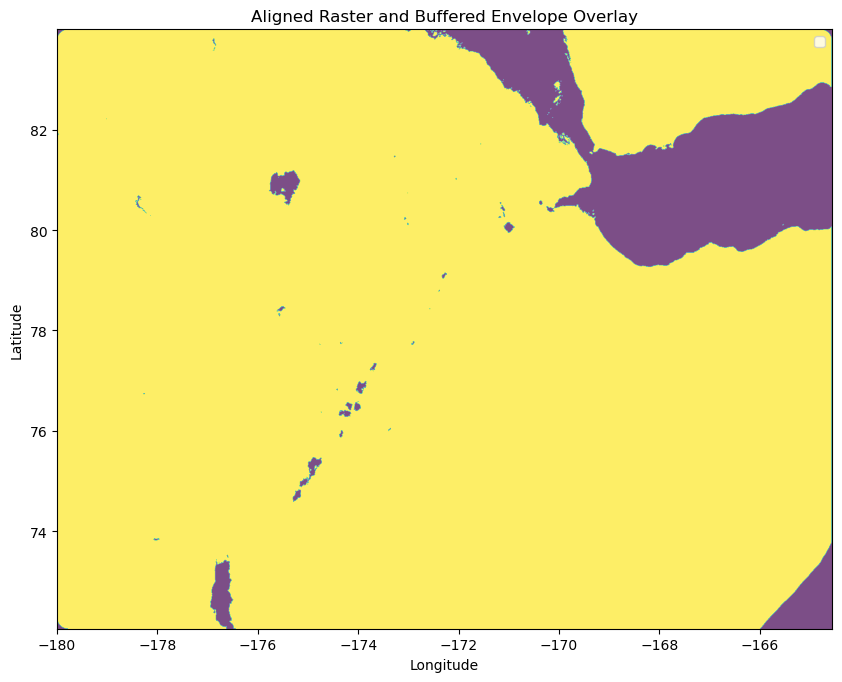

Clipped raster saved to: Data/Processed/clipped_raster.tif


In [32]:
from rasterio.mask import mask
from rasterio.enums import Resampling
from rasterio.transform import from_bounds
import numpy as np
import geopandas as gpd
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt


# Path to the saved GeoTIFF and the buffered envelope GeoDataFrame
#----------------------------------------------------------------------------------------------
# simply replace this with save_path defined earlier
#----------------------------------------------------------------------------------------------
tiff_path = "Data/External/Population/ppp_2020_1km_Aggregated.tif"
#----------------------------------------------------------------------------------------------

buffered_envelope = envelope_gdf_buffered  # Assuming this was created earlier

# Open the GeoTIFF
with rasterio.open(tiff_path) as src:
    # Get the CRS of the raster
    raster_crs = src.crs
    
    # Check and reproject the buffered envelope to match the raster CRS
    if buffered_envelope.crs != raster_crs:
        buffered_envelope = buffered_envelope.to_crs(raster_crs)
    
    # Read the first band of the raster for plotting
    raster_data = src.read(1)  # Read band 1
    
    # Get the extent of the raster
    raster_extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the raster
    show(raster_data, transform=src.transform, extent=raster_extent, ax=ax, cmap='viridis', alpha=0.7)
    
    # Plot the buffered envelope
    buffered_envelope.boundary.plot(ax=ax, edgecolor='red', linewidth=2, label='Buffered Envelope')

    # Customize the plot
    ax.set_title("Aligned Raster and Buffered Envelope Overlay")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.legend()
    
    # Show the plot
    plt.show()

# Output path for the clipped raster
output_tiff_path = "Data/Processed/clipped_raster.tif"

# Step 1: Load the GeoTIFF and buffered envelope
with rasterio.open(tiff_path) as src:
    # Ensure the buffered envelope is in the same CRS as the raster
    if envelope_gdf_buffered.crs != src.crs:
        envelope_gdf_buffered = envelope_gdf_buffered.to_crs(src.crs)
    
    # Convert the geometry of the buffered envelope to GeoJSON format
    envelope_geometry = [feature["geometry"] for feature in envelope_gdf_buffered.__geo_interface__["features"]]
    
    # Step 2: Clip the raster using the envelope geometry
    clipped_data, clipped_transform = mask(src, envelope_geometry, crop=True)
    
    # Update the metadata for the clipped raster
    clipped_meta = src.meta.copy()
    clipped_meta.update({
        "driver": "GTiff",
        "height": clipped_data.shape[1],
        "width": clipped_data.shape[2],
        "transform": clipped_transform
    })
    
    # Step 3: Write the clipped raster to a new file
    with rasterio.open(output_tiff_path, "w", **clipped_meta) as dst:
        dst.write(clipped_data)

            # Create the plot
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the raster
    show(clipped_data, transform=src.transform, extent=raster_extent, ax=ax, cmap='viridis', alpha=0.7)
    
    # Customize the plot
    ax.set_title("Aligned Raster and Buffered Envelope Overlay")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.legend()
    
    # Show the plot
    plt.show()
        
print(f"Clipped raster saved to: {output_tiff_path}")



In [33]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

# Path to the clipped raster
clipped_tiff_path = "Data/Processed/clipped_raster.tif"

# Get the CRS of the intersection GeoDataFrame
gdf_crs = intersected_gdf.crs

# Open the clipped GeoTIFF
with rasterio.open(clipped_tiff_path, "r+") as src:
    # Check if the CRS matches
    if src.crs != gdf_crs:
        print("CRS mismatch detected. Reprojecting GeoTIFF...")

        # Calculate the transform and dimensions for the target CRS
        transform, width, height = calculate_default_transform(
            src.crs, gdf_crs, src.width, src.height, *src.bounds
        )

        # Update the metadata for the reprojected GeoTIFF
        reprojected_meta = src.meta.copy()
        reprojected_meta.update({
            "crs": gdf_crs,
            "transform": transform,
            "width": width,
            "height": height
        })

        # Create an in-memory raster for reprojection
        data = []
        for i in range(1, src.count + 1):
            reprojected_band = src.read(i, out_shape=(height, width))
            reproject(
                source=rasterio.band(src, i),
                destination=reprojected_band,
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=gdf_crs,
                resampling=Resampling.nearest
            )
            data.append(reprojected_band)

        # Write the reprojected data back to the original file
        src.close()
        with rasterio.open(clipped_tiff_path, "w", **reprojected_meta) as dst:
            for i in range(1, src.count + 1):
                dst.write(data[i - 1], i)

        print(f"GeoTIFF reprojected and overwritten: {clipped_tiff_path}")
    else:
        print("CRS matches. No reprojection needed.")


CRS mismatch detected. Reprojecting GeoTIFF...
GeoTIFF reprojected and overwritten: Data/Processed/clipped_raster.tif


In [34]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import numpy as np

# Path to the adjusted raster
adjusted_tiff_path = "Data/Processed/clipped_raster.tif"

# Load the intersection GeoDataFrame (intersected_gdf)
# Assuming this is already created in the previous steps

# Create a new column in intersected_gdf to store the population sum
intersected_gdf['feature_population'] = 0

# Add a unique 'feature_id' column based on the index
intersected_gdf['feature_id'] = intersected_gdf.index

# Open the adjusted population raster
with rasterio.open(adjusted_tiff_path) as src:
    # Iterate through each feature in the GeoDataFrame
    for idx, row in intersected_gdf.iterrows():
        # Get the geometry of the current feature
        geom = [row['geometry']]
        
        try:
            # Mask the raster with the feature's geometry
            out_image, out_transform = mask(src, geom, crop=True)
            
            # Flatten the masked raster and remove NoData values
            out_image = out_image[0]  # Assuming a single band raster
            out_image = out_image[out_image != src.nodata]
            
            # Sum the population values and assign to the GeoDataFrame
            population_sum = np.sum(out_image)
            intersected_gdf.at[idx, 'feature_population'] = population_sum
        
        except Exception as e:
            # Handle any errors (e.g., empty geometries or mask issues)
            print(f"Error processing feature {idx}: {e}")

# Display the updated GeoDataFrame with the new 'feature_id' and 'feature_population' columns
print(intersected_gdf[['feature_id', 'pg_id', 'feature_population']].head())


# Optionally, save the updated GeoDataFrame to a new shapefile
#intersected_gdf.to_file("/path/to/your/folder/intersected_with_population.shp")


   feature_id   pg_id  feature_population
0           0  134359         7295.258301
1           1  134359         7295.258301
2           2  134359         7295.258301
3           3  134359         7295.258301
4           4  134359         7295.258301


In [35]:
# Sort the GeoDataFrame by 'pg_id' and 'feature_id'
intersected_gdf_sorted = intersected_gdf.sort_values(by=['pg_id', 'feature_id'])

# Display the sorted GeoDataFrame
print(intersected_gdf_sorted[['feature_id', 'pg_id', 'feature_population']].head(10))  # Display top 10 rows


   feature_id   pg_id  feature_population
0           0  134359         7295.258301
1           1  134359         7295.258301
2           2  134359         7295.258301
3           3  134359         7295.258301
4           4  134359         7295.258301
5           5  134359         7295.258301
6           6  134359         7295.258301
7           7  134359         7295.258301
8           8  134359          513.298584
9           9  134359          513.298584


In [36]:
import geopandas as gpd

# Group by 'pg_id' and sum the population for each group
cell_population = intersected_gdf.groupby('pg_id')['feature_population'].sum().reset_index()
print(cell_population)
# Rename the column to 'Cell_population'
cell_population.rename(columns={'feature_population': 'Cell_population'}, inplace=True)

# Merge the 'Cell_population' back into the original GeoDataFrame
intersected_gdf = intersected_gdf.merge(cell_population, on='pg_id')

# Display the updated GeoDataFrame with the new 'Cell_population' field
print(intersected_gdf[['pg_id','feature_population', 'Cell_population']].head())

# Optionally, save the updated GeoDataFrame to a new shapefile
#intersected_gdf.to_file("/path/to/your/folder/intersected_with_cell_population.shp")


      pg_id  feature_population
0    134359        62468.455078
1    134360       149799.968750
2    135076        19688.058899
3    135077       156533.330566
4    135078       676671.733521
..      ...                 ...
427  150917       204314.235840
428  150918        16663.741455
429  150919       325494.799805
430  150920        91937.578125
431  150921        47579.480469

[432 rows x 2 columns]
    pg_id  feature_population  Cell_population
0  134359         7295.258301     62468.455078
1  134359         7295.258301     62468.455078
2  134359         7295.258301     62468.455078
3  134359         7295.258301     62468.455078
4  134359         7295.258301     62468.455078
